In [1]:
%pip install folium

  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


#### For your convenience, we have already written code to import the data below.


In [4]:
import requests
import io
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

# Raise an error if the request failed
response.raise_for_status()

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Print confirmation
print('Data downloaded and read into a dataframe!')

# Optional: Show the first few rows of the dataframe
df.head()


Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


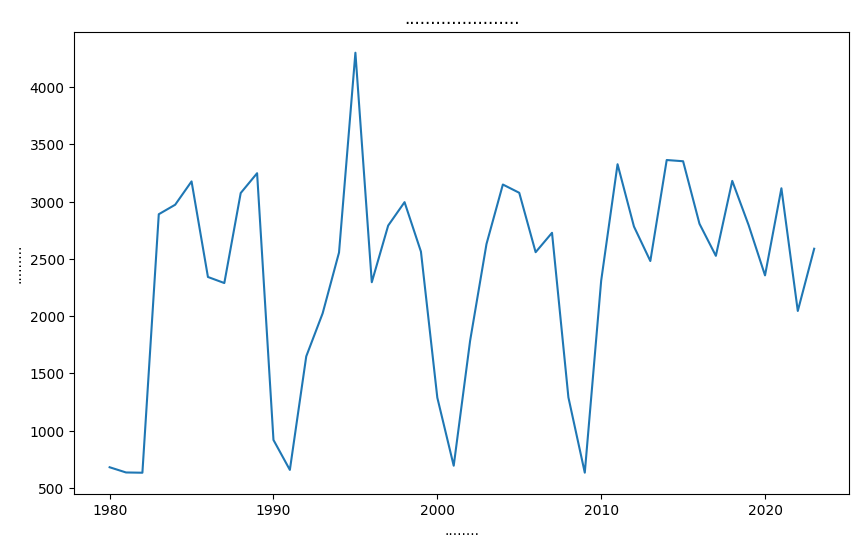

In [8]:
    #create data for plotting
    df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('........')
    plt.ylabel('.........')
    plt.title('......................')
    plt.show()


####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


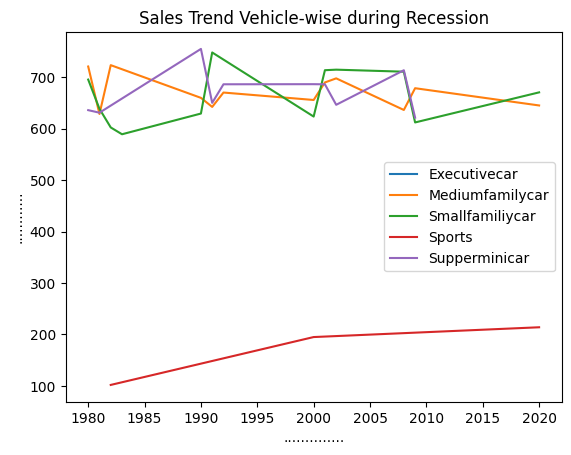

In [9]:
    df_rec = df[df['Recession']==1]
    df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


<details><summary>Click here for a hint</summary>

<p>
     To visualize the average number of vehicles sold during recession and non-recession periods, you can use a bar chart
        <br> You will need to group recession average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


C:\Users\abbas\AppData\Local\Temp\ipykernel_3128\2029623015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recession', y='Automobile_Sales', data=new_df, palette='pastel')


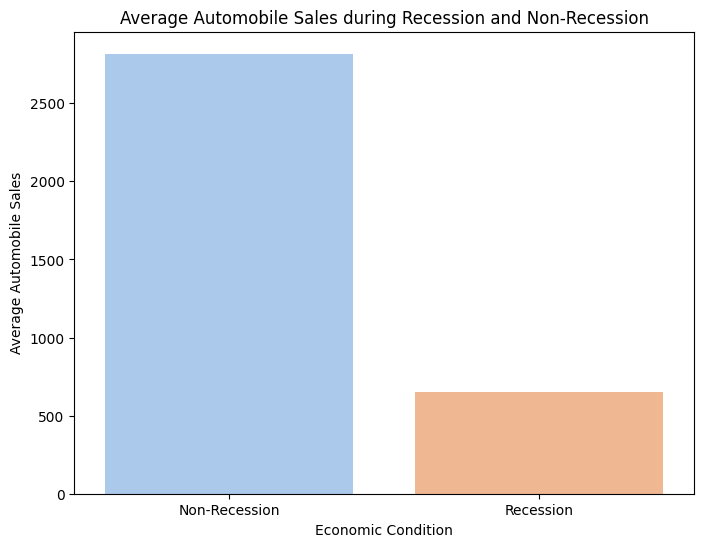

In [14]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(8, 6))  # Set appropriate figure size
sns.barplot(x='Recession', y='Automobile_Sales', data=new_df, palette='pastel')
plt.xlabel('Economic Condition')  # Label for the x-axis
plt.ylabel('Average Automobile Sales')  # Label for the y-axis
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])  # Custom tick labels
plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

Text(0.5, 0, 'Year')

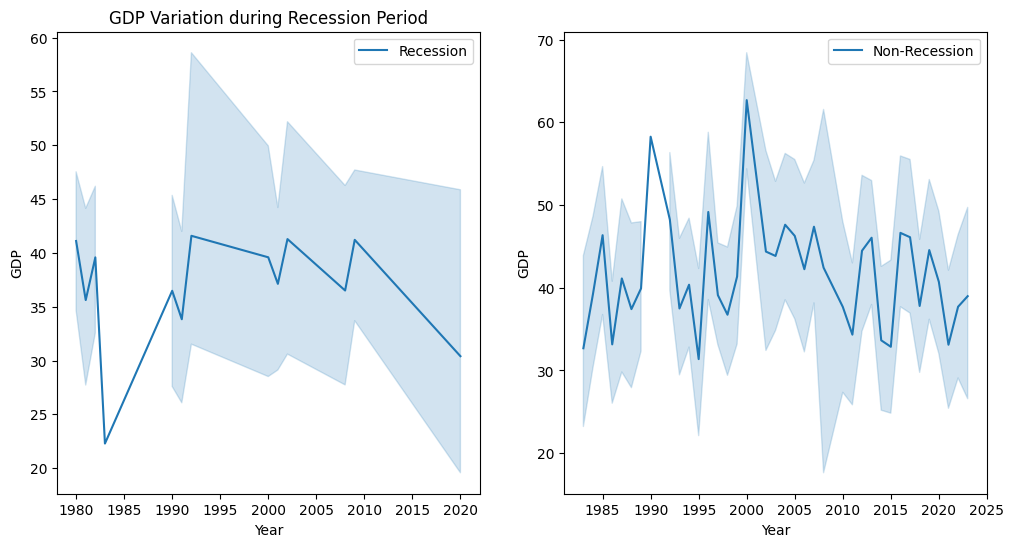

In [16]:
# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot for recession data
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot for non-recession data
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

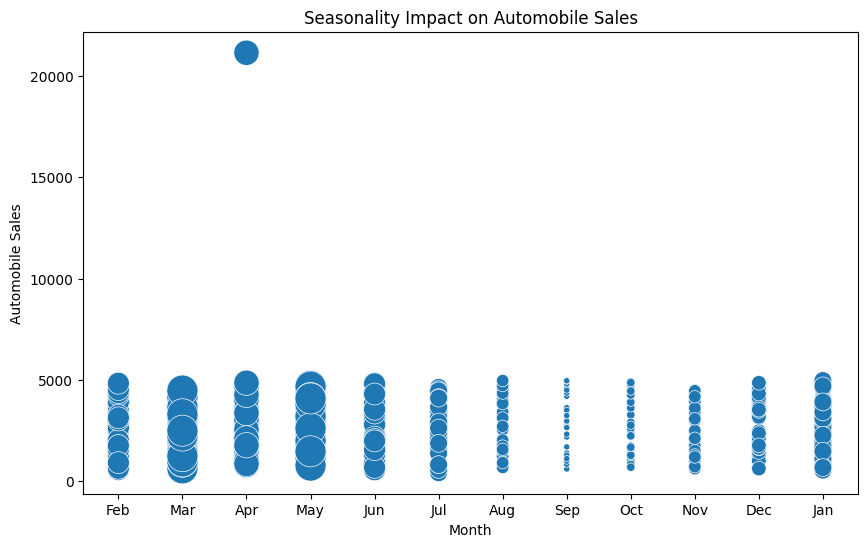

In [17]:
# Filter for non-recession data
non_rec_data = df[df['Recession'] == 0]

# Size for bubble effect
size = non_rec_data['Seasonality_Weight'] * 100  # Scale size for better visibility

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, sizes=(20, 500), legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales 

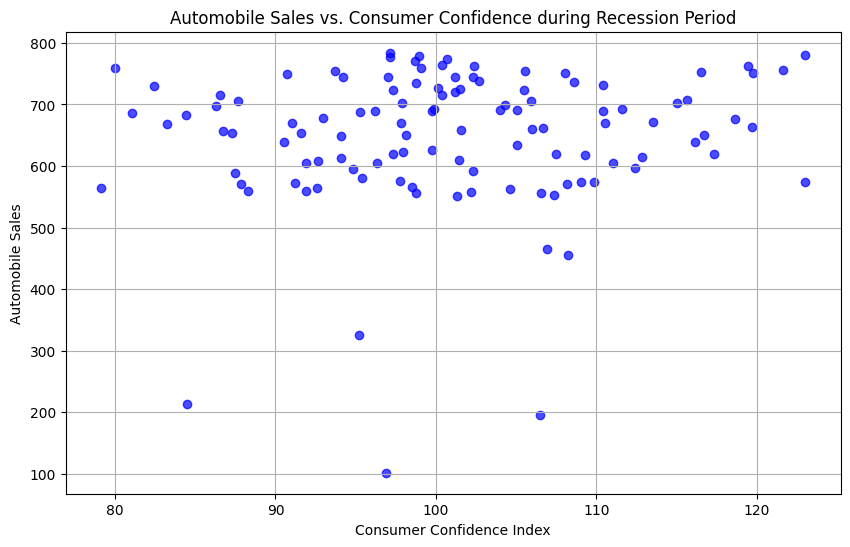

In [18]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], color='blue', alpha=0.7)

plt.xlabel('Consumer Confidence Index')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales vs. Consumer Confidence during Recession Period')
plt.grid()
plt.show()

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


<details><summary>Click here for a hint</summary>

<p>
     You can create two dataframe for recession and nonreccession period.
    <br> Calculate the sum of Advertising_Expenditure for both dataframes
    <br> Pass these total values to plt.pie(). May include labels as ['Recession', 'Non-Recession']
        <br>Feel Free to customie the pie further
    <br>title this plot as  - Advertising Expenditure during Recession and Non-Recession Periods</p>
</details>


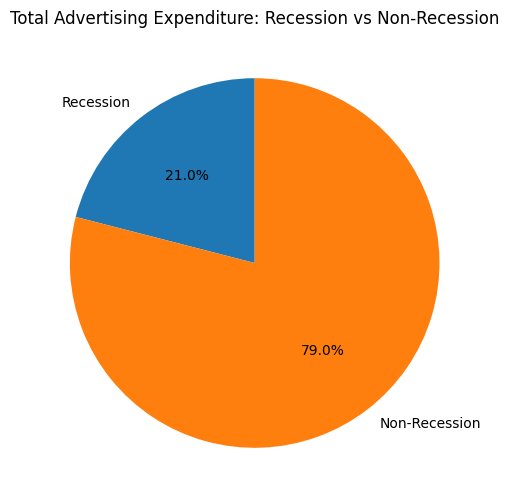

In [19]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertising Expenditure: Recession vs Non-Recession')

plt.show()

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period


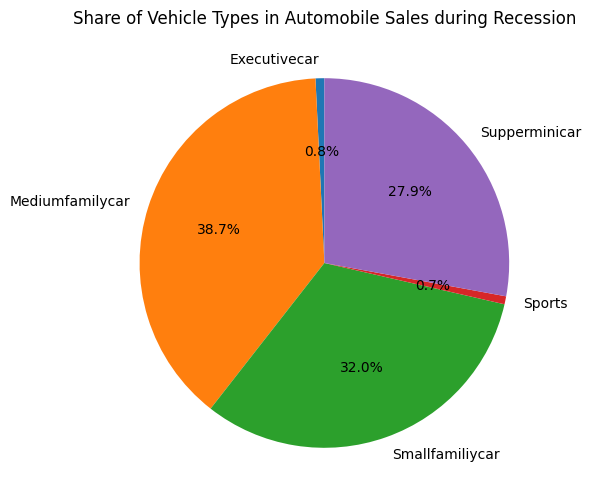

In [20]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Vehicle Types in Automobile Sales during Recession')

plt.show()

 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.


C:\Users\abbas\AppData\Local\Temp\ipykernel_3128\2784505393.py:5: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',


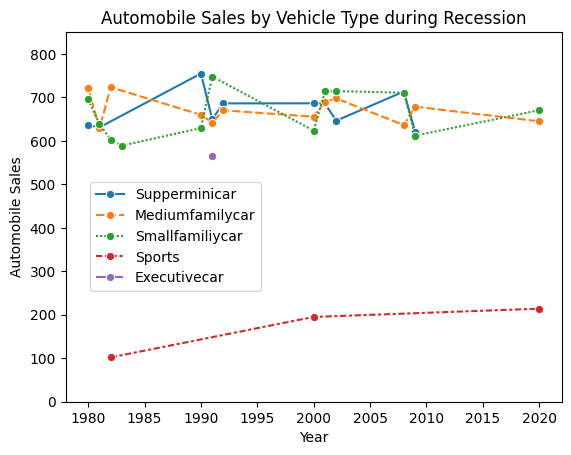

In [24]:
# Filter the data for recession periods
df_rec = df[df['Recession'] == 1]

# Create the line plot
sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

plt.ylim(0, 850)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales by Vehicle Type during Recession')

# Customize legend position
plt.legend(loc=(0.05, 0.3))

In [32]:
!pip install aiohttp


  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached multidict-6.1.0-cp312-cp312-win_amd64.whl.metadata (5.1 kB)
Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
Using cached attrs-24.2.0-py3-none-any.whl (63 kB)
Using cached multidict-6.1.0-cp312-cp312-win_amd64.whl (28 kB)


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period
